In [1]:
%matplotlib widget

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure
from skimage.draw import ellipsoid
from skimage.draw import polygon



# Generate a level set about zero of two identical ellipsoids in 3D
ellip_base = ellipsoid(6, 10, 16, levelset=True)
ellip_2 = ellipsoid(12, 4, 10, levelset=True)

print(ellip_base.shape)
print(ellip_2.shape)
# ellip_double = np.concatenate((ellip_base[:-1, ...],
#                                ellip_2[2:, ...]), axis=0)

# Use marching cubes to obtain the surface mesh of these ellipsoids
verts, faces, normals, values = measure.marching_cubes(ellip_base, 0)
verts2, faces2, normals2, values2 = measure.marching_cubes(ellip_2, 0)


# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(0, 36)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 20)  # b = 10
ax.set_zlim(0, 32)  # c = 16

mesh2 = Poly3DCollection(verts2[faces2])
mesh2.set_edgecolor('c')
ax.add_collection3d(mesh2)

plt.tight_layout()
plt.show()

(192, 256, 256)


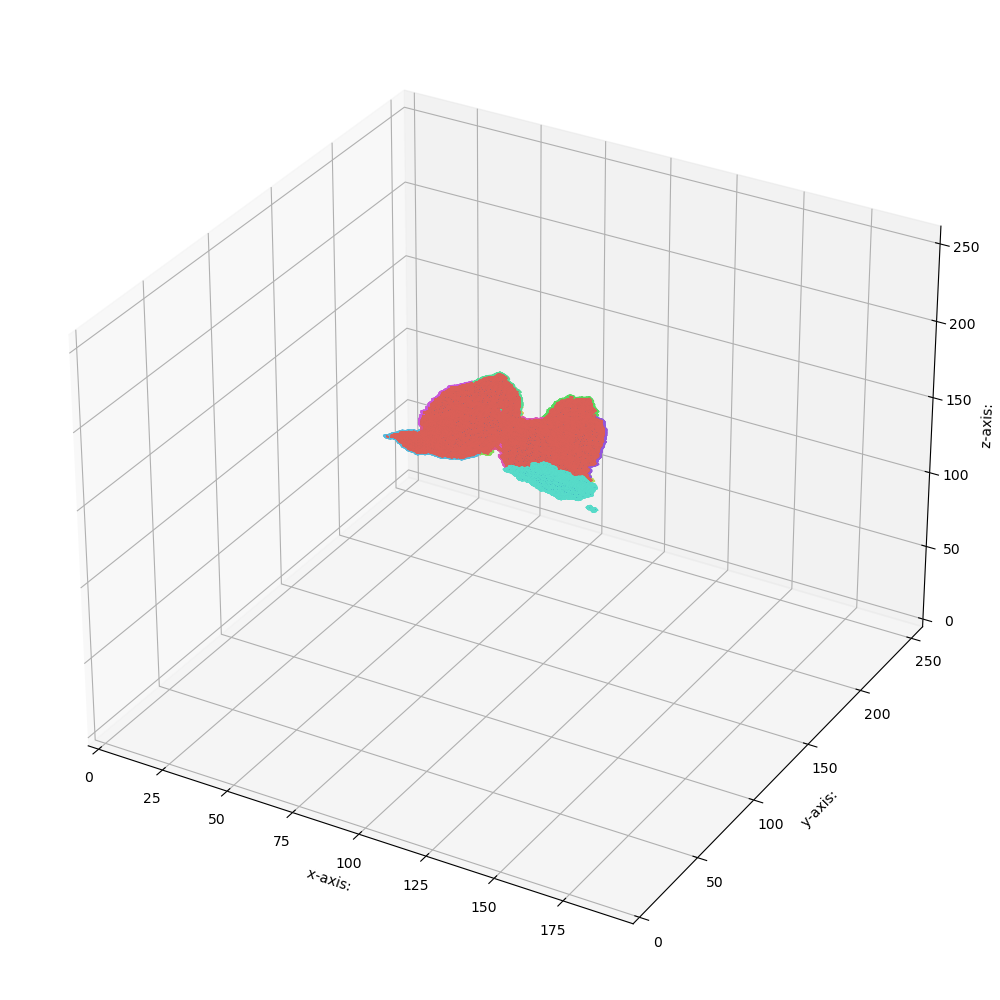

In [3]:
import nibabel as nib
img = nib.load("C:/Users/aniru/Pictures/CAHI01M.ch.nii.gz")
plt.ion()
import seaborn as sns
print(img.shape)
palette = sns.color_palette("hls", 15)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
meshes = []
for i in range(15):
    ind = np.where(img.get_fdata()  == i) 
    img_array = np.zeros_like(img.get_fdata())
    img_array[ind] = 1
    verts, faces, normals, values = measure.marching_cubes(img_array,0)

    
    mesh = Poly3DCollection(verts[faces])
    mesh.set_edgecolor(palette[i])
    meshes.append(mesh)
    
   


ax.set_xlabel("x-axis: ")
ax.set_ylabel("y-axis: ")
ax.set_zlabel("z-axis: ")

ax.set_xlim(0, 196)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 256)  # b = 10
ax.set_zlim(0,256)  # c = 16
for mesh in meshes:
    ax.add_collection3d(mesh)
plt.tight_layout()
plt.show()

In [3]:
plt.savefig("test.pdf")

<Figure size 432x288 with 0 Axes>